# Data Exploration Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import mason_functions as mf
import nltk
import unicodedata
import re
import acquire
import prepare

from nltk import sentiment
from wordcloud import WordCloud
from scipy import stats

Do your work for this exercise in a file named explore.

## Exercise I
Spam Data

    a. Load the spam data set.
    b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    c. Is there any overlap in the bigrams for the spam data and the ham data?
    d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

### a. 
Load the spam data set.

In [2]:
# load data
df = pd.read_csv('spam_clean.csv')

# preview
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# get spam info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
# get values and counts for the label column
df.label.value_counts(), df.label.value_counts(normalize = True)

(ham     4825
 spam     747
 Name: label, dtype: int64,
 ham     0.865937
 spam    0.134063
 Name: label, dtype: float64)

In [5]:
# combine all messages in single string by label
ham_words = prepare.basic_clean(' '.join(df[df.label == 'ham'].text))
spam_words = prepare.basic_clean(' '.join(df[df.label == 'spam'].text))
all_words = prepare.basic_clean(' '.join(df.text))

In [6]:
# get frequencies
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [7]:
# check word frequencies in ham data
ham_freq

i              2188
you            1837
to             1554
the            1118
a              1055
               ... 
clover            1
smith             1
thangamits        1
cya               1
auctionpunj       1
Length: 7560, dtype: int64

In [8]:
# check word frequencies in spam data
spam_freq

to             686
a              376
call           347
you            287
your           263
              ... 
8883             1
stopbcm          1
rcd              1
eg23f            1
08702490080      1
Length: 3033, dtype: int64

In [9]:
# check word frequencies overall
all_freq

to             2240
i              2233
you            2124
a              1431
the            1322
               ... 
keypad            1
whatus            1
faber             1
09050001295       1
rr                1
Length: 9562, dtype: int64

In [10]:
# get normalized frequencies
ham_nfreq = pd.Series(ham_words.split()).value_counts(normalize = True)
spam_nfreq = pd.Series(spam_words.split()).value_counts(normalize = True)
all_nfreq = pd.Series(all_words.split()).value_counts(normalize = True)

In [11]:
ham_nfreq

i              0.032405
you            0.027206
to             0.023015
the            0.016558
a              0.015625
                 ...   
clover         0.000015
smith          0.000015
thangamits     0.000015
cya            0.000015
auctionpunj    0.000015
Length: 7560, dtype: float64

In [12]:
spam_nfreq

to             0.038991
a              0.021371
call           0.019723
you            0.016312
your           0.014948
                 ...   
8883           0.000057
stopbcm        0.000057
rcd            0.000057
eg23f          0.000057
08702490080    0.000057
Length: 3033, dtype: float64

In [13]:
all_nfreq

to             0.026317
i              0.026235
you            0.024954
a              0.016813
the            0.015532
                 ...   
keypad         0.000012
whatus         0.000012
faber          0.000012
09050001295    0.000012
rr             0.000012
Length: 9562, dtype: float64

In [14]:
# concat all frequencies together into a dataframe
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2188,45,2233
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


In [15]:
word_counts.sort_values('all', ascending = False).head(20)

,ham,spam,all
to,1554,686,2240
i,2188,45,2233
you,1837,287,2124
a,1055,376,1431
the,1118,204,1322
u,972,147,1119
and,848,122,970
is,728,158,886
in,811,73,884
me,756,30,786


In [16]:
word_counts.sort_values(['ham', 'spam'], ascending = [True, False]).head(50)

,ham,spam,all
claim,0,113,113
prize,0,92,92
won,0,73,73
guaranteed,0,50,50
tone,0,48,48
18,0,43,43
awarded,0,38,38
a1000,0,35,35
150ppm,0,34,34
a2000,0,31,31


Visualize distributions of top words

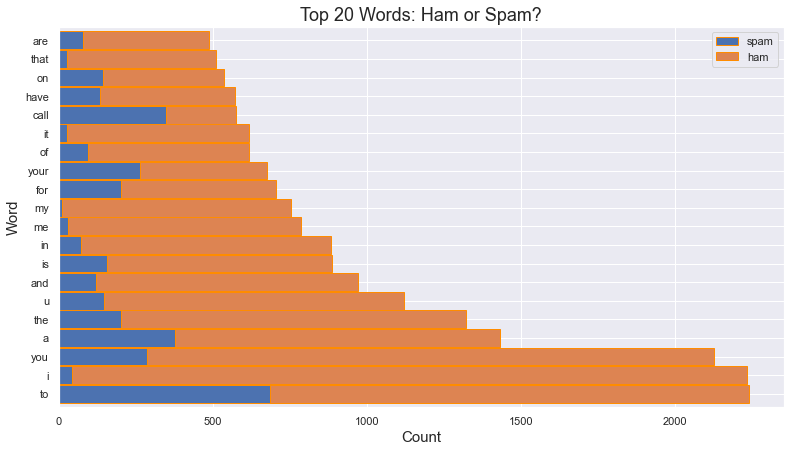

In [17]:
plt.rc('font', size = 18)    # set default text size
plt.rc('figure', figsize = (13, 7))    # set default figure size

# plot word counts for sorted top 20 words and show ham and spam counts with a bar chart
word_counts.sort_values('all', ascending = False).head(20)[['spam', 'ham']].plot.barh(stacked = True,\
                                                                                      width = .96,\
                                                                                      ec = 'darkorange'
                                                                                     )
plt.title('Top 20 Words: Ham or Spam?', size = 18)    # title
plt.xlabel('Count', size = 15)    # x-axis label
plt.ylabel('Word', size = 15);    # y-axis label

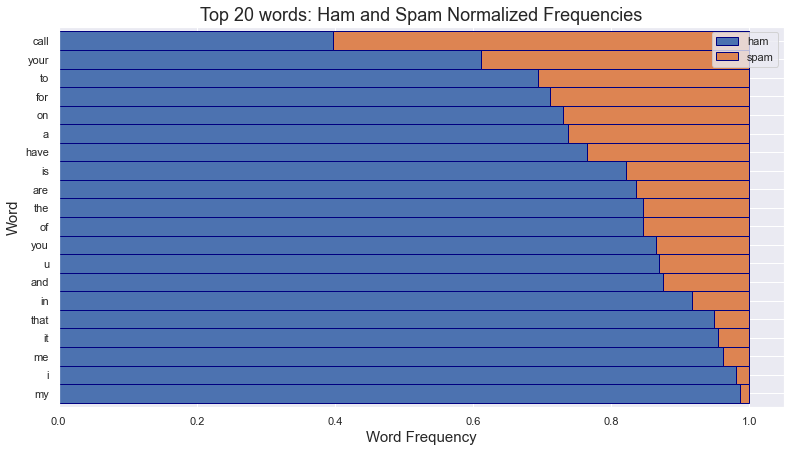

In [18]:
# plot word frequencies for ham and spam's top 20 words (top 20 words in data set)
word_counts.sort_values('all', ascending = False)\
.head(20)\
.apply(lambda row: row / row['all'], axis = 1)\
.drop(columns = 'all')\
.sort_values('spam')\
.plot.barh(stacked = True, width = .99999, ec = 'navy')    # plot bar graph of top 20 words' ham and spam frequencies
plt.title('Top 20 words: Ham and Spam Normalized Frequencies', size = 18)    # title
plt.xlabel('Word Frequency', size = 15)    # x-axis label
plt.ylabel('Word', size = 15);    # y-axis label

### b. 
Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [19]:
spam_top_20_bigrams = pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(20)
spam_top_20_bigrams

(you, have)           73
(have, won)           54
(your, mobile)        49
(to, claim)           46
(please, call)        44
(this, is)            40
(won, a)              40
(to, contact)         37
(you, are)            35
(stop, to)            28
(u, have)             27
(cash, or)            27
(a, a2000)            25
(or, a)               25
(will, be)            25
(contact, u)          24
(po, box)             24
(a1000, cash)         23
(guaranteed, call)    23
(to, receive)         23
dtype: int64

In [20]:
ham_top_20_bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(20)
ham_top_20_bigrams

(are, you)     173
(i, am)        132
(have, a)      110
(i, will)       98
(you, are)      91
(do, you)       91
(in, the)       86
(i, have)       83
(if, you)       83
(i, dont)       82
(want, to)      79
(going, to)     76
(i, was)        74
(in, a)         73
(and, i)        71
(have, to)      70
(i, can)        70
(but, i)        70
(to, be)        66
(to, get)       65
dtype: int64

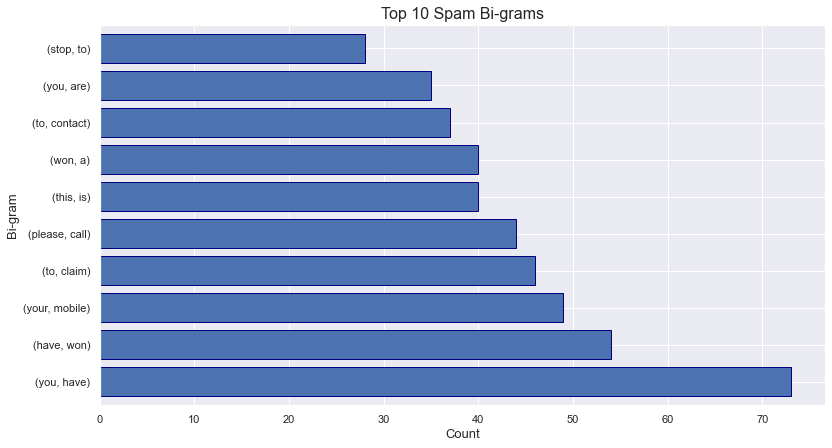

In [21]:
# plot bar chart of top ten spam bi-grams
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh(width = .78, ec = 'navy')
plt.title('Top 10 Spam Bi-grams', size = 16)    # title
plt.xlabel('Count', size = 13)    # x-axis label
plt.ylabel('Bi-gram', size = 13);    # y-axis label

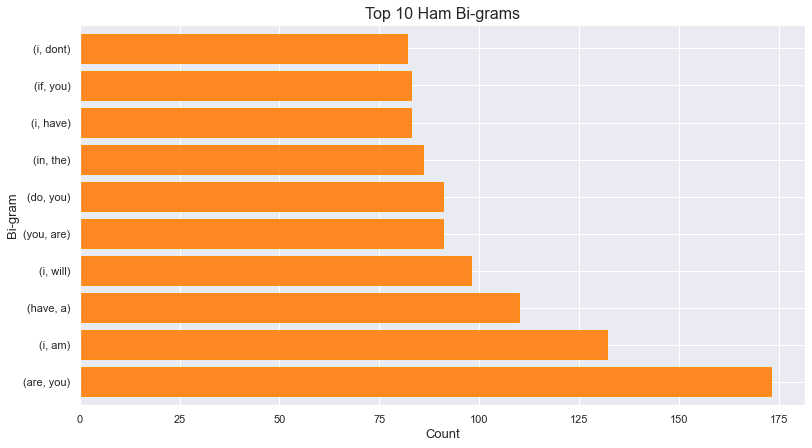

In [22]:
# plot bar chart of top ten ham bi-grams
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh(alpha = .91\
                                                                             , color = 'tab:orange'\
                                                                             , width = .78, ec = 'darkorange'
                                                                            )
plt.title('Top 10 Ham Bi-grams', size = 16)    # title
plt.xlabel('Count', size = 13)    # x-axis label
plt.ylabel('Bi-gram', size = 13);    # y-axis label

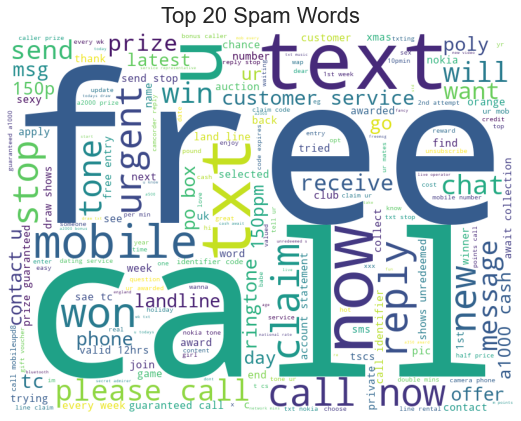

In [23]:
# generate image using word cloud to show top 20 spam words
img = WordCloud(background_color = 'white', width = 800, height = 600).generate(spam_words)
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Spam Words', size = 22, pad = 11);

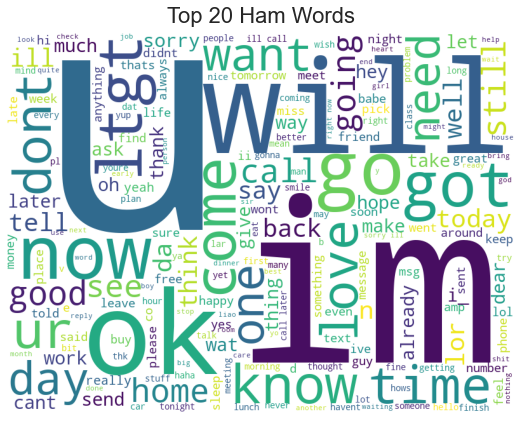

In [24]:
# generate image using word cloud to show top 20 ham words
img = WordCloud(background_color = 'white', width = 800, height = 600).generate(ham_words)
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Ham Words', size = 22, pad = 11);

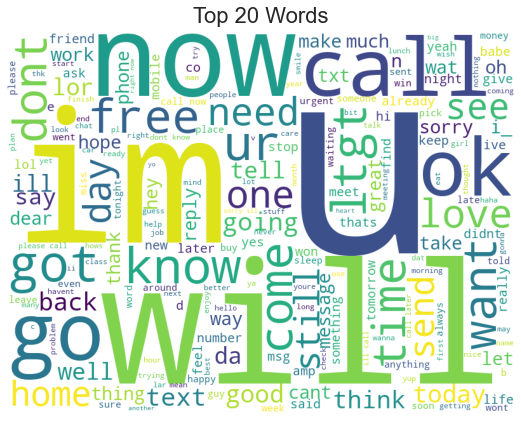

In [25]:
# generate image using word cloud to show top 20 words
img = WordCloud(background_color = 'white', width = 800, height = 600).generate(all_words)
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Words', size = 22, pad = 11);

In [26]:
# create message length and word count columns
df['message_length'] = df.text.apply(len)
df['word_count'] = df.text.apply(prepare.basic_clean).apply(str.split).apply(len)

df.head()    # check it

,label,text,message_length,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


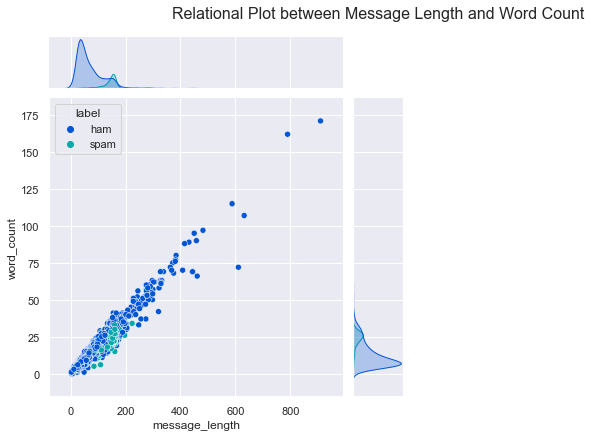

In [27]:
sns.jointplot(data = df, x = 'message_length', y = 'word_count', hue = 'label', palette = 'winter')
plt.title('Relational Plot between Message Length and Word Count', size = 16, pad = 80);

Spam messages are 200 characters or less and 38 words or less.

In [28]:
# group by label and view mean and median message lengths
df.groupby('label').message_length.agg(['mean', 'median'])

,mean,median
label,,
ham,71.023627,52
spam,138.866131,149


### View Sentiment Analysis Scores

In [29]:
# create object
vader = sentiment.SentimentIntensityAnalyzer()

# analyze sentiment of text data
df['sentiment'] = df.text.apply(lambda doc: vader.polarity_scores(doc)['compound'])
df

,label,text,message_length,word_count,sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,0.6249
1,ham,Ok lar... Joking wif u oni...,29,6,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,0.7964
3,ham,U dun say so early hor... U c already then say...,49,11,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,-0.1027
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,30,0.8805
5568,ham,Will Ì_ b going to esplanade fr home?,37,8,0.0000
5569,ham,"Pity, * was in mood for that. So...any other s...",57,9,-0.2960
5570,ham,The guy did some bitching but I acted like i'd...,125,26,0.8934


In [30]:
# view average and median sentiment scores for ham and spam
df.groupby('label').sentiment.agg(['mean','median'])

,mean,median
label,,
ham,0.152218,0.0000
spam,0.436018,0.6107


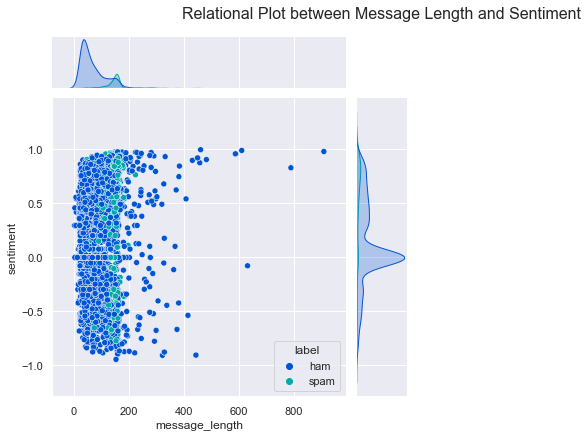

In [31]:
# plot message length vs sentiment and hue by label
sns.jointplot(data = df, x = 'message_length', y = 'sentiment', hue = 'label', palette = 'winter')
plt.title('Relational Plot between Message Length and Sentiment', size = 16, pad = 80);

All the spam messages are around 200 characters in length. Compound sentiment scores are uniformally distributed across the spectrum.

#### Plot Distributions

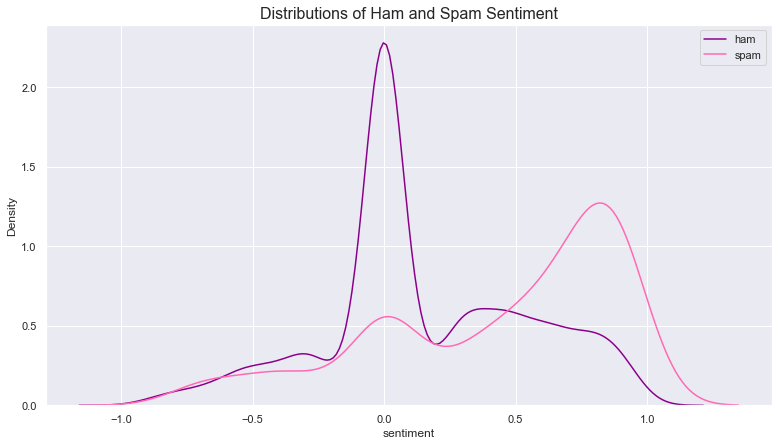

In [32]:
# plot kde plots for ham and spam
sns.kdeplot(df[df.label == 'ham'].sentiment, label = 'ham', color = 'darkmagenta')
sns.kdeplot(df[df.label == 'spam'].sentiment, label = 'spam', color = 'hotpink')
plt.legend(['ham', 'spam'])
plt.title('Distributions of Ham and Spam Sentiment', size = 16);

Sentiment for spam is not as uniformally distributed as I inferred from the penultimate chart. A dense chuck of sentiment scores are between 0.5 and 1

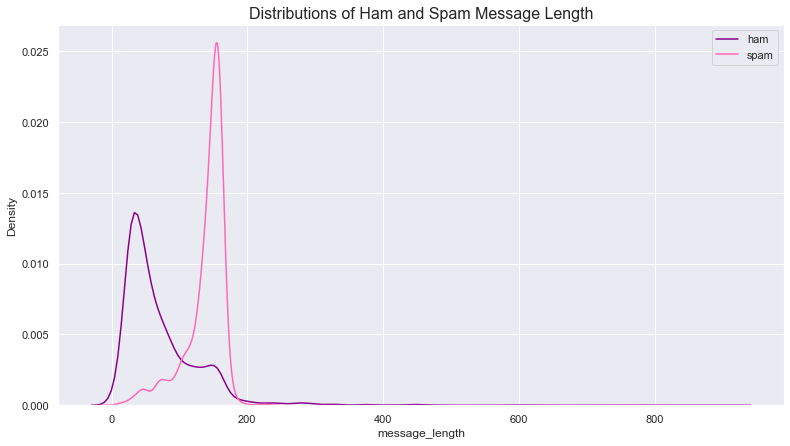

In [33]:
# plot kde plots for ham and spam
sns.kdeplot(df[df.label == 'ham'].message_length, label = 'ham', color = 'darkmagenta')
sns.kdeplot(df[df.label == 'spam'].message_length, label = 'spam', color = 'hotpink')
plt.legend(['ham', 'spam'])
plt.title('Distributions of Ham and Spam Message Length', size = 16);

Spam messages are typically greater in lenth, it seems.

In [34]:
print(f"Records of Ham data: {len(df[df.label == 'ham'])}")
print(f"Records of Spam data: {len(df[df.label == 'spam'])}")

Records of Ham data: 4825
Records of Spam data: 747


#### Assumptions for T-Test:
- X Normally Distributed: Central Limit Theorem says the abundance of observations in the sample make it ok.
- X Independence of Observations: Message lengths for spam messages are independent of message lengths of ham messages. Or are they? 
- Homoscedasticity: Will test for equal variances.

#### Null hypothesis: Spam message lengths are, on average,  the same or less as ham message lengths.
#### Alternate hypothesis: Spam message lengths are, on average, significantly greater than ham message lengths.

In [35]:
spam_lengths = df[df.label == 'spam'].message_length    # assign variable to series of spam message lengths
ham_lengths = df[df.label == 'ham'].message_length    # assign variable to series of ham message lengths

spam_lengths.var(), ham_lengths.var()    # variances for ham and spam message lengths at a glance

(851.6522964063543, 3365.8588943881678)

These variances are definitely different.

In [36]:
stat, p = stats.levene(spam_lengths, ham_lengths)
stat, p

(107.2853833059385, 6.480882112738383e-25)

Also, the low p-value suggests I should reject the levene's null hypothesis that the variances are the same.

In [37]:
# run t-test
t_stat, p = stats.ttest_ind(spam_lengths, ham_lengths, equal_var = False, alternative = 'greater')
t_stat, p

(50.04566212486782, 0.0)

#### The extremely high t-statistic and the p-value allow me to say with extreme confidence that spam message lengths are significantly greater in length (character wise) than ham messages.

###### Spam messages are longer.

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


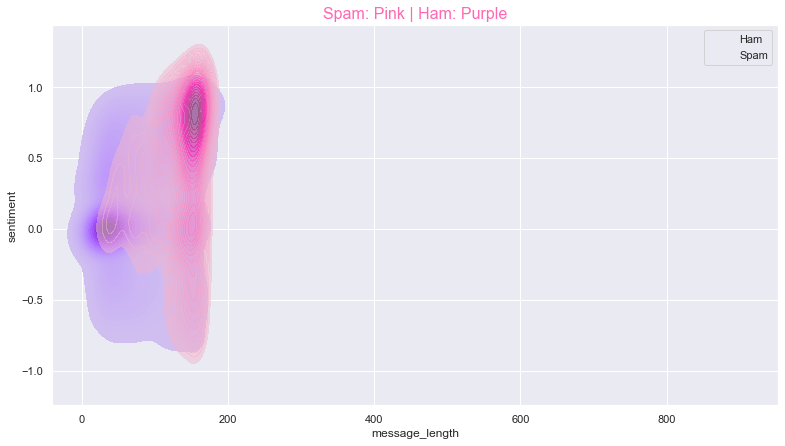

In [38]:
# Bivariate KDE plot for message_length vs sentiment score 
sns.kdeplot(df[df.label == 'ham'].message_length\
            , df[df.label == 'ham'].sentiment\
            , levels = 30\
            , shade = True\
            , color = 'indigo'\
            , label = 'Ham'
           )
sns.kdeplot(df[df.label == 'spam'].message_length\
            , df[df.label == 'spam']\
            .sentiment\
            , levels = 30\
            , shade = True\
            , alpha = 0.5\
            , color = 'hotpink'\
            , label = 'Spam'
           )

plt.legend()
plt.title('Spam: Pink | Ham: Purple', size = 16, color = 'hotpink');

Sentiment is more uniformally distributed for ham while for spam it is more skewed toward the negative scores (more of the distribution is positive).

### c. 
Is there any overlap in the bigrams for the spam data and the ham data?

### d.
Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

## Exercise II
Explore the blog articles using the techniques discussed in the exploration lesson.

## Exericse III
Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.